In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('./hospitalizaciones_train.csv')
df_test = pd.read_csv('./hospitalizaciones_test.csv')

In [3]:
# creación de columna binaria (estadía larga o corta)

df_train.loc[df_train['Stay (in days)'] <= 8, 'Stay_bool'] = 0
df_train.loc[df_train['Stay (in days)'] > 8, 'Stay_bool'] = 1  


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay_bool
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0.0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1.0
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1.0
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1.0


In [4]:
# conversión de los casos a valores numéricos para poder correlacionarlos

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype != ('int64' or 'float'):
        df_train[column]= le.fit_transform(df_train[column])

In [5]:
correlation = df_train.corr()

<AxesSubplot:>

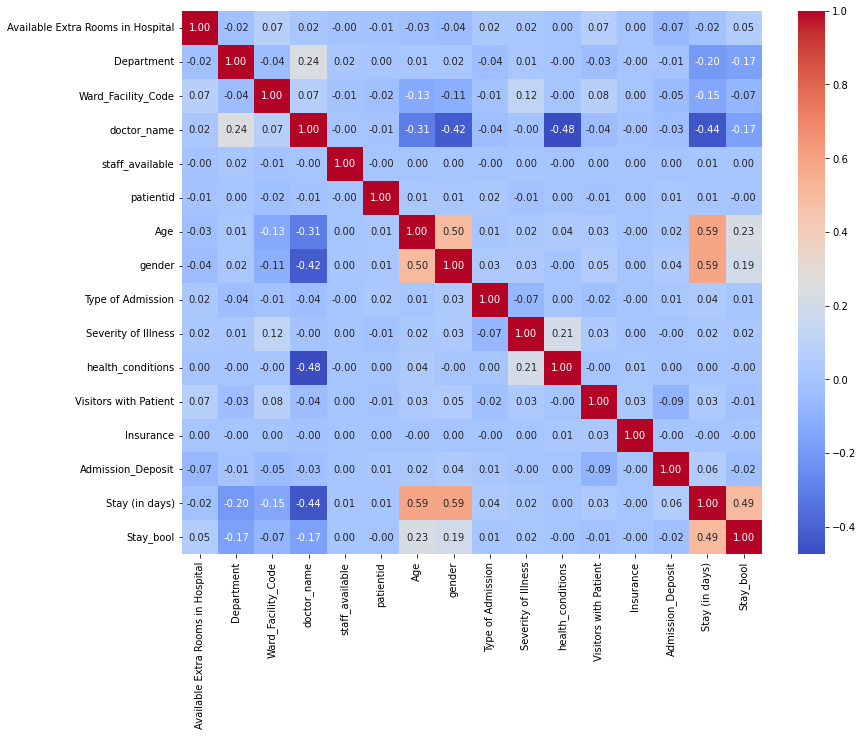

In [6]:
# heatmap para graficar los coeficientes de correlación y seleccionar las features que tengan mayor coeficiente en relación con la estadía

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (13,10))
sns.heatmap(correlation, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm')

In [8]:
# seleccionamos las features que tienen mayor correlaciíon con la estadía para nuestro modelo de ML

high_corr = df_train[['Department','Age', 'gender','doctor_name']]
high_corr  

,Department,Age,gender,doctor_name
0,2,4,0,8
1,2,3,0,8
2,2,2,0,8
3,2,3,0,4
4,1,7,1,2
...,...,...,...,...
409995,2,3,0,6
409996,2,2,0,3
409997,2,2,0,6
409998,2,2,0,4


Probamos la regresión logística

In [9]:
X = high_corr
y = df_train['Stay_bool']

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)


y_pred = lr.predict(X)


# evaluamos accuracy y recall del modelo

from sklearn.metrics import accuracy_score 
print('Accuracy:', accuracy_score(y, y_pred))

from sklearn.metrics import recall_score
print('Recall:', recall_score(y, y_pred))

Accuracy: 0.5878512195121951
Recall: 0.8222233532746578


Implementamos el modelo de árbol de decisión

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


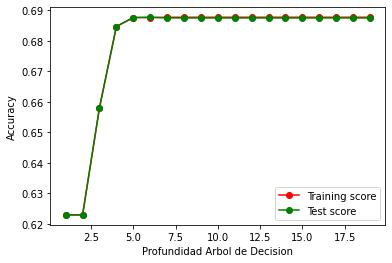

In [13]:
# evaluamos la profundidad ideal para el árbol

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad,random_state = 42)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)  # corremos el modelo 5 veces
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    #clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [15]:
# creamos un arbol con la profundidad más conveniente 

clf = DecisionTreeClassifier (max_depth = 4, random_state= 42)

from sklearn.model_selection import train_test_split 

x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
# evaluamos 

from sklearn.metrics import accuracy_score

print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(x_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(x_eval, y_eval)))

#este modelo tiene mayor precisión

Precisión en el set de entrenamiento:  0.68
Precisión en el set de testeo:  0.68


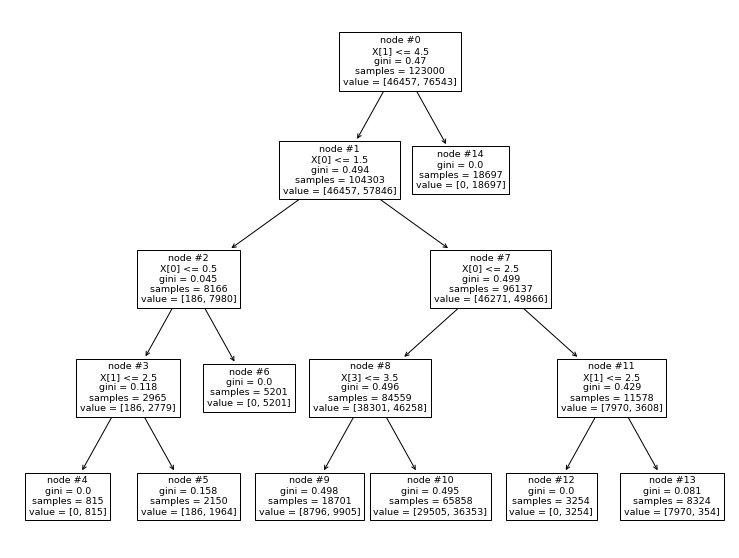

In [17]:
# graficamos 

from sklearn import tree
plt.figure(figsize = (13,10))
tree.plot_tree(clf.fit(x_eval,y_eval), node_ids = True)
plt.show()

In [19]:
# predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(x_train)

# predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(x_eval)


Matriz de confusión

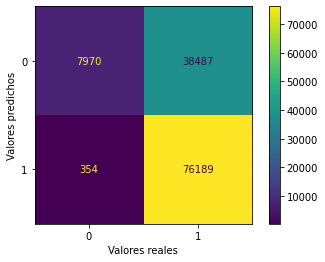

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


train_matrix= confusion_matrix(y_train, y_train_pred)
test_matrix = confusion_matrix(y_eval, y_test_pred)

traincm_display = ConfusionMatrixDisplay(train_matrix)
testcm_display = ConfusionMatrixDisplay(test_matrix)


testcm_display.plot()

plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')

plt.show()

In [21]:
#Accuracy
clf_accuracy = accuracy_score(y_eval, y_test_pred)
print('Accuracy:', clf_accuracy)

#Recall
clf_recall = recall_score(y_eval, y_test_pred)
print('Recall:', clf_recall)

Accuracy: 0.684219512195122
Recall: 0.9953751486092784


Creación de pipeline

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# creamos dos pipelines y los guardamos en una lista
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', DecisionTreeClassifier(random_state=42))])


pipelines = [pipe_lr, pipe_dt]

# creamos un diccionario para organizarlos
pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [23]:
# entrenamos 

for pipe in pipelines:
    pipe.fit(x_train, y_train)

# evaluamos

for idx, val in enumerate(pipelines):
    print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(x_eval, y_eval)))

# identificamos el mejor modelo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(x_eval, y_eval) > best_acc:
        best_acc = val.score(x_eval, y_eval)
        best_pipe = val
        best_clf = idx
print('Modelo con mejor accuracy: %s' % pipe_dict[best_clf])

Regresión Logística pipeline accuracy en test: 0.595
Árbol de decisión pipeline accuracy en test: 0.687
Modelo con mejor accuracy: Árbol de decisión


In [24]:
# guardamos el pipeline en un archivo

import joblib

joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])

best_model = joblib.load('best_pipeline.pkl')

best_model.fit(x_train,y_train)
best_model.score(x_eval, y_eval)

Pipeline de Árbol de decisión guardado a archivo


0.6871626016260163

In [25]:
# normalización de columnas

for column in df_test.columns:
    if df_test[column].dtype == ('object'):
        df_test[column]=df_test[column].str.lower()


# conversión de los casos a valores numéricos

encoder = preprocessing.LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype != ('int64' or 'float'):
        df_test[column]=encoder.fit_transform(df_test[column])

df_test

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,1,5,4,10,2858,2,0,1,2,5,2,0,52469
1,2,4,4,1,4,65657,5,0,1,2,0,2,1,24227
2,2,2,4,1,7,45598,5,2,1,2,4,3,0,75017
3,2,1,5,4,1,31132,2,0,1,2,4,2,1,19861
4,2,0,0,1,7,125021,5,0,1,0,1,2,0,53798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,1,5,6,2,43001,1,0,1,1,3,3,0,23729
89996,13,1,5,4,8,85601,3,0,0,2,5,2,0,45398
89997,2,1,1,6,3,22447,1,0,0,2,3,2,0,74998
89998,2,2,0,1,1,29957,6,0,1,0,1,2,0,49049


In [27]:
# predecimos en el set de testeo con las mismas features y guardamos los resultados en csv

high_corr_test = df_test[['Department','Age', 'gender','doctor_name']]

y = clf.predict(high_corr_test)

pred = pd.DataFrame(y.reshape(-1,1), columns=['pred'])
pred.to_csv('mag-garcia.csv', index=False)